# Predicting Sale Price

 ## Dataset Attributes

 The dataset in this project contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 The dataset I will be using contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this project is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [22]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [23]:
# Read in the data set
ames_data = pd.read_csv("ames.csv")

# View the data
ames_data.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


First, I will assess if the data needs to be cleaned or pre-processed. I start by using the method below to view information on the dataset.

In [24]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


This confirms there are 2930 records in the data, and 14 columns, all of which contain integer data, and zero null values. There may however, be some duplicate rows. In the cell below, I make sure these are removed, and then check the shape of the dataframe again.

In [25]:
# Drop duplicate rows
ames_data = ames_data.drop_duplicates()

ames_data.shape

(2923, 14)

I can see that 7 records were identified as duplicates and removed from the data. Since there doesn't appear to be any null values or incorrect data types, I can start to explore the dataset some more.

Note that while every column in the data is of integer type, some are still representing continuous values. For example, attributes like 'Garage_Area' and 'Sale_Price' may have just been rounded to the nearest integer, whereas 'Fireplaces' and 'Full_Bath', take on discrete values since they count the number of fireplaces and bathrooms, respectively.

## Exploratory Data Analysis

First, using the .describe method, I can get an idea of the summary statistics for each variable.

In [26]:
ames_data.describe()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000
mean,1971.310298,1984.251112,1051.796100,1159.433459,334.915840,1499.037290,1.563804,0.379063,2.852549,1.043106,6.442696,0.599042,472.693124,180793.054396
std,30.255062,20.865723,440.469747,392.138899,427.361419,504.915043,0.549049,0.501196,0.823892,0.211387,1.573561,0.647238,214.870790,79915.178796
min,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1965.000000,793.000000,876.000000,0.000000,1125.500000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,320.000000,129500.000000
50%,1973.000000,1993.000000,990.000000,1082.000000,0.000000,1442.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,480.000000,160000.000000
75%,2001.000000,2004.000000,1302.000000,1384.000000,703.500000,1742.500000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,576.000000,213500.000000
max,2010.000000,2010.000000,6110.000000,5095.000000,2065.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1488.000000,755000.000000


For example, I can see that the mean property sale price in the table is $180,793.05, the oldest house was built in 1872, and the average number of above-grade kitchens is just over 1.

To begin my analysis, I am going to explore the relationships between all variables in the dataset by creating a correlation matrix.

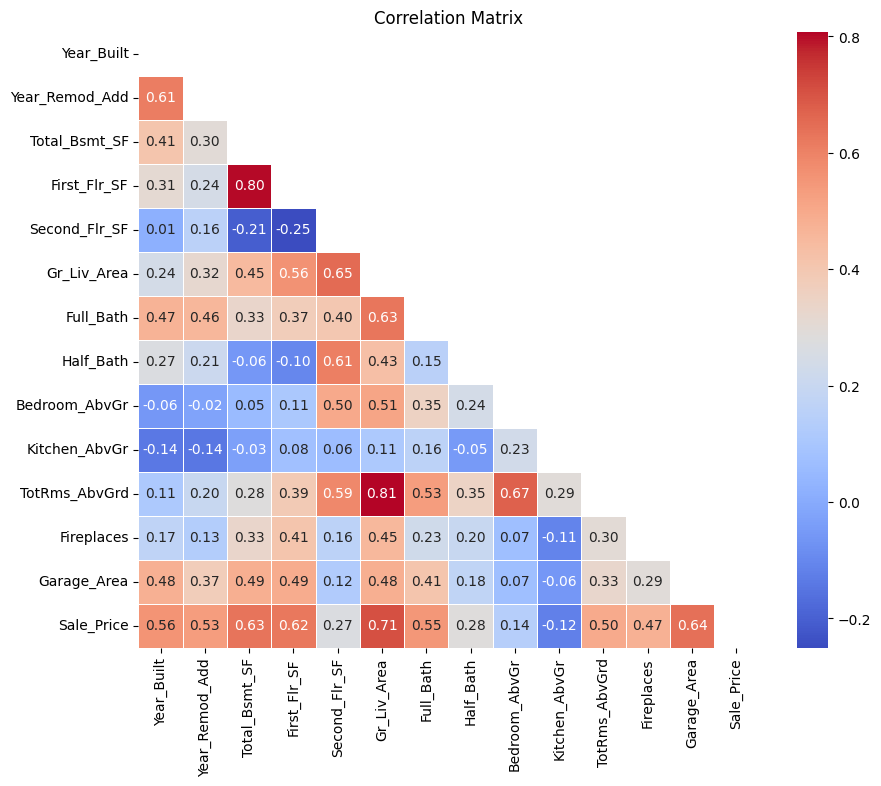

In [27]:
correlation_matrix = ames_data.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the correlation matrix
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, mask = mask)
plt.title('Correlation Matrix')
plt.show()

The strongest relationship in the correlation matrix appears to be between 'TotRms_AbvGrd' and 'Gr_Liv_Area', which is not too surprising, since with a higher number of rooms in a property, one would expect a larger ground living area.

Sale Price will be a key variable in my analysis, and I can see by looking at the correlation values that this variable has the strongest positive relationship with Gr_Liv_Area and Garage_Area, since these values are closest to 1. Further on in my analysis, I will investigate these variables further with the aim of utilising them in a model to predict the Sale Price.

The weakest correlation with Sale Price, which is actually a negative relationship, is of that with Kitchen_AbvGr. This means that the greater the number of above grade kitchens in a property, actually tends to relate to a very slight decrease in the sale price.

How does Sale Price vary for some of the other continuous variables in the data, such as area of basement, first floor and second floor?

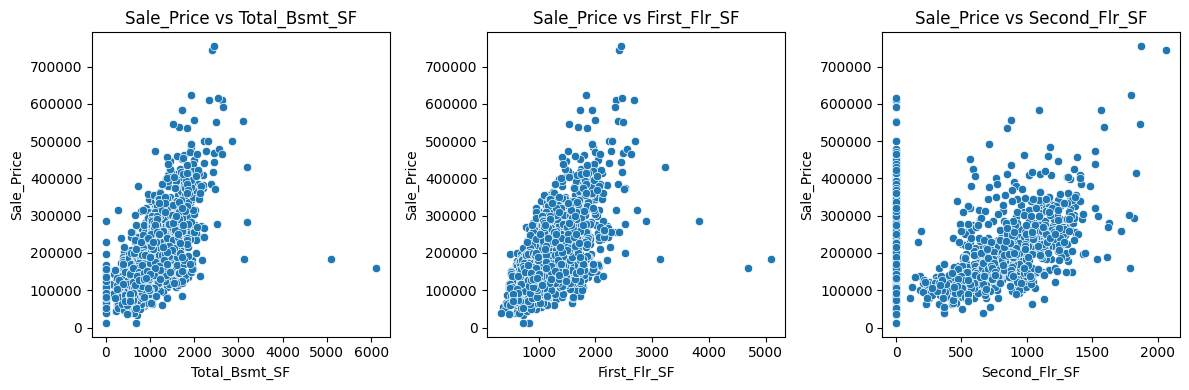

In [28]:
# Variables to compare
vars = ['Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF']

# Create grid of subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot scatter plots
for i, var in enumerate(vars):
    sns.scatterplot(x = ames_data[var], y = ames_data['Sale_Price'], ax = axes[i])
    axes[i].set_title(f'Sale_Price vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Sale_Price')

# Prevent overlap
plt.tight_layout()
plt.show()

From these scatter plots, I can see there are pretty strong linear relationships between sale price and total basement area, as well as sale price and first floor area. For second floor area, the correlation matrix only showed the correlation coefficient of 0.27 and this plot has highlighted why this is the case. Many of the houses do not have a second floor, leading to many values of 0 in the data for second floor area. If these values were to be removed, the rest of the data would likely show a fairly strong positive correlation. However, these values are valid data and removing them would lead to a loss of data about houses without second floors. 

In all cases, there are several extreme high values for area, as well as sale price, that most likely are outliers representing very expensive, or large, homes. Again, these points still represent valid data, they are just properies with unusually high value or size. Therefore, removing these outliers would remove important information about extreme ends of the data, which may be relevant in predicting sale prices.

Let's now view the distribution of Sale Price.

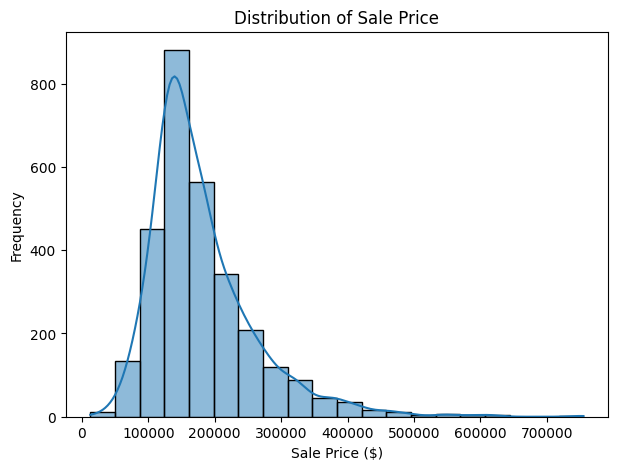

In [29]:
plt.figure(figsize=(7, 5))
sns.histplot(ames_data['Sale_Price'], kde = True, bins = 20)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

The histogram shows that Sale Price is approximately normally distributed but with a longer tail on the right, ie. a positive skew. So, while most homes have sale prices near the lower or middle range, there are a smaller number of high-priced houses that "pull" the distribution to the right.

Next, I want to investigate how the Sale Price of houses might relate to the year they were built. Since Sale Price is likely to vary a lot each year, I am going to group the houses by the years they were built and calculate the average sale price for each year. Then I can plot these averages for each year and see the overall trend of how house prices have changed over time.

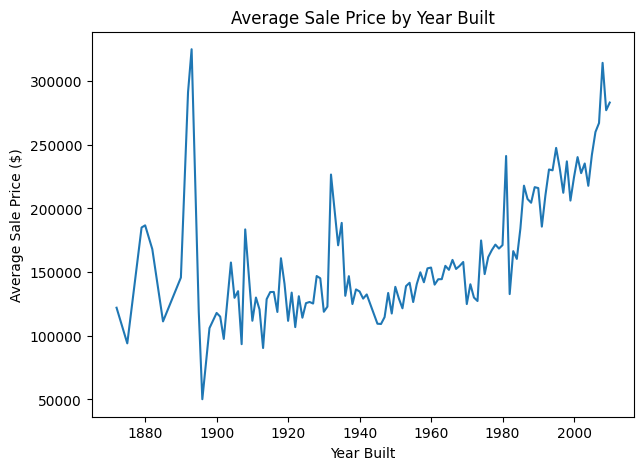

In [30]:
# Group by Year_Built and calculate the mean Sale_Price for each
avg_sale_price_by_year = ames_data.groupby('Year_Built')['Sale_Price'].mean().reset_index()

# Plot average Sale_Price against Year_Built
plt.figure(figsize = (7, 5))
sns.lineplot(data = avg_sale_price_by_year, x = 'Year_Built', y = 'Sale_Price')
plt.title('Average Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price ($)')
plt.show()

Now, I can see that sale prices have increased for houses built in more recent years, and the relationship appears to be somewhat non-linear, with a slight upward curve in the last 50 years or so. In addition, we see great volatility in the sale price of the oldest houses in the dataset. This is likely not suggesting that average sale price was higher than ever in 1890, but instead probably due to the fact there are not very many properties of this age in the dataset, and so the averages become more meaningful in recent years with more data.

Finally, I want to see how the Sale Price varies with the total number of rooms. To do this I will plot some bloxplots of Sale Price, for each value of 'TotRms_AbvGrd'.

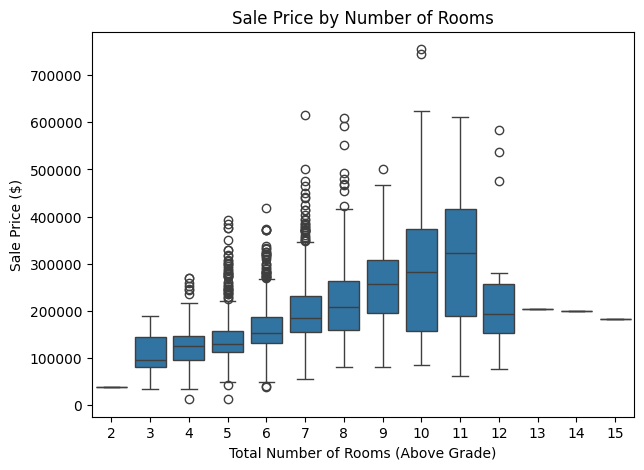

In [31]:
plt.figure(figsize=(7, 5))
sns.boxplot(x = ames_data['TotRms_AbvGrd'], y = ames_data['Sale_Price'])
plt.title('Sale Price by Number of Rooms')
plt.xlabel('Total Number of Rooms (Above Grade)')
plt.ylabel('Sale Price ($)')
plt.show()

In the boxplots, as the number of rooms increases, the median sale price increases consistently, suggesting that larger houses, with more rooms, tend to have higher sale prices. As the number of rooms increases, the spread of sale prices also increases, indicating more variability in the sale prices for larger homes. Wider boxes show more data in the middle 50% of sale prices, whilst the longer whiskers indicate there are more extreme values in terms of sale price. The median sale price drops off at 12 rooms or more, which may be due to there being less data points for homes of this size, or even special cases like very old mansions, multi-family housing etc. Where the boxes near enough disappear, there must be very few observations for this range of homes, causing the analysis to be less reliable here.

## Building a Multiple Linear Regression Model

In this section, I aim to build a multiple linear regression model that can predict house sale price based on size of above-grade ground living area, and garage area. Both Gr_Liv_Area and Garage_Area have been identified as being strongly correlated with the sale price based on my exploratory data analysis, which is why they should be effective features in the model. I first need to identify these variables and assign them to X, the independent variables, and y, the dependent variable.

In [32]:
X = ames_data[['Gr_Liv_Area', 'Garage_Area']]  # Independent variables
y = ames_data['Sale_Price']  # Dependent variable (target)

Let's view the distributions of our independent variables.

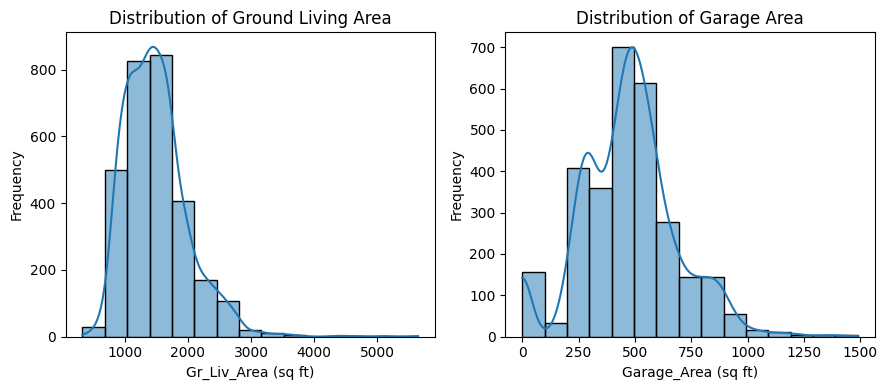

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Plot the Gr_Liv_Area distribution on the first subplot
sns.histplot(ames_data['Gr_Liv_Area'], kde = True, bins = 15, ax = axes[0])
axes[0].set_title('Distribution of Ground Living Area')
axes[0].set_xlabel('Gr_Liv_Area (sq ft)')
axes[0].set_ylabel('Frequency')

# Plot the Garage_Area distribution on the second subplot
sns.histplot(ames_data['Garage_Area'], kde = True, bins = 15, ax = axes[1])
axes[1].set_title('Distribution of Garage Area')
axes[1].set_xlabel('Garage_Area (sq ft)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Both variables roughly follow the shape of a Gaussian Distribution with slight positive skew, caused by the presence of extreme high values of household area in the data, as touched on previously.

I want to explore the relationships between these variables and the dependent variable (Sale_Price). This will help me to understand how the independent variables influence the dependent variable, and can provide insights into how well the regression model may perform. Although I already identified strong positive correlations between the target variable and the independent variables, let's visualise the relationships to confirm this. I do this below using scatter plots with a linear regression line.

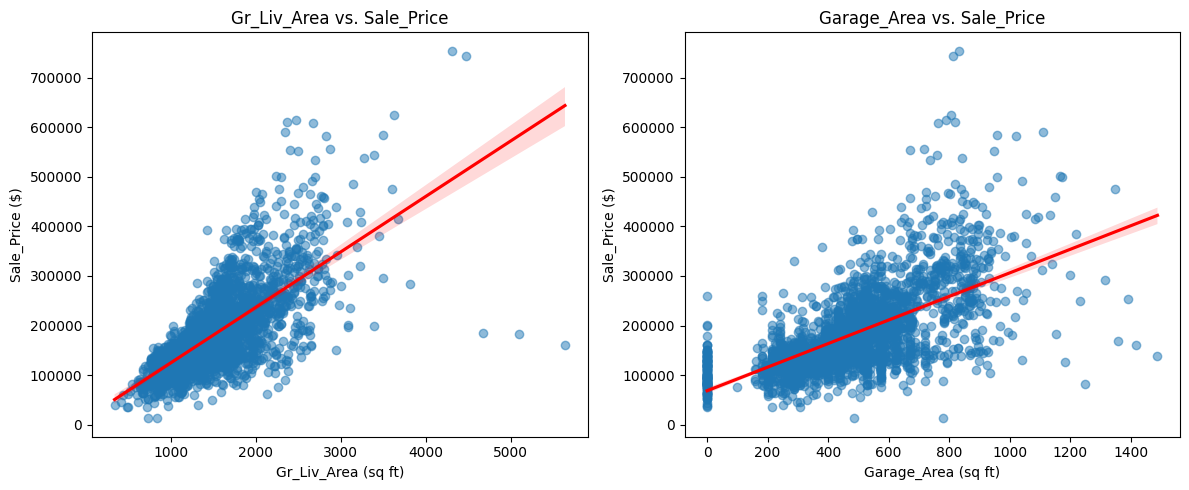

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Gr_Liv_Area vs. Sale_Price
sns.regplot(x = 'Gr_Liv_Area', y = 'Sale_Price', data = ames_data, ax = ax[0], scatter_kws = {'alpha': 0.5}, line_kws = {'color': 'red'})
ax[0].set_title('Gr_Liv_Area vs. Sale_Price')
ax[0].set_xlabel('Gr_Liv_Area (sq ft)')
ax[0].set_ylabel('Sale_Price ($)')

# Plot for Garage_Area vs. Sale_Price
sns.regplot(x = 'Garage_Area', y = 'Sale_Price', data = ames_data, ax = ax[1], scatter_kws = {'alpha': 0.5}, line_kws = {'color': 'red'})
ax[1].set_title('Garage_Area vs. Sale_Price')
ax[1].set_xlabel('Garage_Area (sq ft)')
ax[1].set_ylabel('Sale_Price ($)')

# Prevent overlap
plt.tight_layout()

plt.show()

In these scatter plots, you can see there is a fairly strong linear trend for both variables with Sale Price, which will be helpful for my linear regression model. High positive correlations suggest the variables will likely contribute in a meaningful way to the model, so I expect a slightly more meaningful contribution from the 'Gr_Liv_Area' variable than 'Garage_Area' where the points are a little more scattered. Regardless, there is a clear upwards trend in both cases.

I can see there are some outliers in my data which could potentially skew the results of my regression model. However, I am assuming they represent real-world data (large, or expensive properties), as opposed to errors or inconsistencies in the data input, and for this reason I will not remove any outliers.

Although my independent variables have the same units, they are on different scales, which may cause the variables to contribute to my model unequally, with the larger scale dominating. For this reason, and since they are approximately normally distributed, I am going to standardise the features using StandardScaler.

In [35]:
# Scaling the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

After standardising, I can split the dataset (using X_scaled in place of X) into training and test sets using a 75% training and 25% testing split.

In [36]:
# Create a training and test set
# Set random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

Now, I can build the multiple linear regression model, using my standardised independent variables.

In [37]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the model intercept and coefficients
print(f'Intercept: {round(model.intercept_, 2)}')
print(f'Coefficients: {np.round(model.coef_, 2)}')

Intercept: 179803.1
Coefficients: [40575.77 31344.14]


Below, I will generate predictions for the test set, and then combine the predictions with their corresponding actual values in order to easily view and compare a few of them.

In [38]:
# Generate predictions
y_pred = model.predict(X_test)

# Combine predictions and actual values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred).astype(int)})

print(comparison_df.head(10))

      Actual  Predicted
1051  426000     301218
2401  275000     250768
1131  141000      77157
1397  144000     196071
679   138000     178402
1749  206580     190834
2362   97500     144638
2397  372397     269341
1398  173000     156999
2445  625000     399614


Here, you can see the first 10 actual values from 'y_test' compared to their predicted values 'y_pred'. While there are some similarities between the values, there is definitely a significant margin of error.

## Model Evaluation

To evaluate the model in more depth, I am going to first compute the Root Mean Squared Error (RMSE) on the test set. This will give me a sense of how far off the predictions are from the actual values, on average.

In [39]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Take square root
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error ($): {round(rmse, 2)}')

Root Mean Squared Error ($): 50710.06


This value for RMSE shows that on average, the model's predictions were off by approximately $50,710.

Additionally, I will compute another metric for evaluating the model's performance, namely the R-Squared Score. This will measure the proportion of variance in the target variable that is explained by the model, ie. how well the model fits the data.

In [40]:
# R squared score
print ("R-squared Score:", round (model.score(X_test, y_test), 2))

R-squared Score: 0.62


An R-Squared Score of 0.62 means that the model explains around 62% of the variance in sale prices.

Next, I will generate an error plot for the model. I am going to create a residual plot, which will help me to visualise the spread of errors, and any patterns that suggest issues with the model.

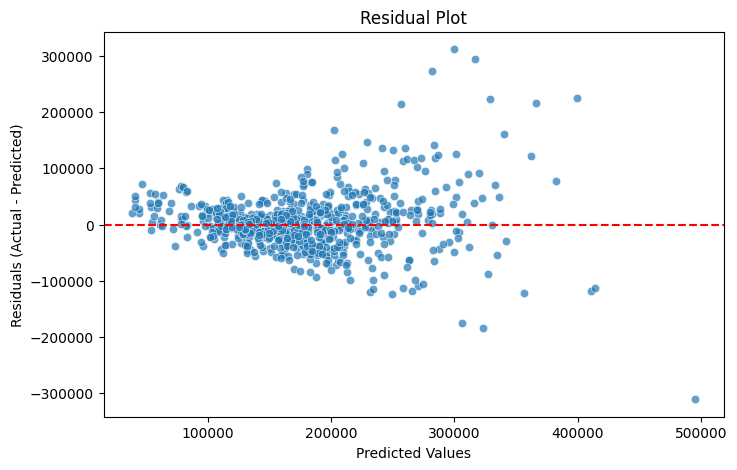

In [41]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x = y_pred, y = residuals, alpha = 0.7)
plt.axhline(y = 0, color = 'r', linestyle = '--')  # Add a horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In the plot above, the residuals are calculated as the difference between the actual values and the predicted values. The red dashed line at zero helps you to see where the residuals are above or below zero. Ideally, the residuals should be scattered randomly around this line, which I would say is true. This indicates the model's errors are randomly distributed. However, since the points are scattered further above and below the line for larger predicted values (ie. for larger sale prices), this shows the errors are larger for higher sale prices, and so the model might be less accurate for these properties.

Finally, I will interpret the model's coefficients within the context of the average value prediction.

In [42]:
# Print the model intercept and coefficients
print(f'Intercept: {round(model.intercept_, 2)}')
print(f'Coefficients: {np.round(model.coef_, 2)}')

Intercept: 179803.1
Coefficients: [40575.77 31344.14]


The intercept is usually the predicted Sale Price when all independent variables are 0. In my case, since I standardised the independent variables, it is the predicted Sale Price when all standardised variables are 0, which corresponds to the mean of the original features. ie. When Gr_Liv_Area is equal to 1499 sq ft and Garage_Area is 473 sq ft, the predicted Sale Price is $179,803.1.

The coefficients relate to the change in the Sale Price for a one standard deviation change in the independent variables (rather than a one-unit change). 

The coefficient for 'Gr_Liv_Area' of approximately 40,576 means that for one standard deviation increase in this variable (standardised), the Sale Price increases by $40,576, holding 'Garage_Area' constant.

Similarly, the coefficient for 'Garage_Area' of approximately 31,344 means that for one standard deviation increase in this variable (standardised), the Sale Price increases by $31,344, holding 'Gr_Liv_Area' constant.

These coefficients reflect changes in standard deviations of the independent variables, meaning they help us understand the relative importance of each variable in predicting the sale price, but they do not provide the exact impact. It tells us that 'Gr_Liv_Area' is of higher relative importance in predicting Sale Price than 'Garage_Area', but not the exact impact of a unit change in the original units (eg. sq ft).

### Suggestions for Improvement

A possible limitation of the model is that while it can accurately predict sale price for lower-priced homes, it is less likely to accurately predict sale price for higher-priced homes.

- Since Sale Price has a right-skewed distribution, applying a log transformation may help to stabilise the variance and made the relationship between the independent and dependent variables more linear. Potentially this would make the model perform better across the entire range of sale prices.
- It may be beneficial to try adding more relevant features to the model to capture more complex relationships and improve predictions.
- I could consider treating outliers differently, for example replace them with the next closest value that is within a certain percentile, or apply scaling that is less sensitive to outliers.
- Consider using a two-stage model to address the problem of not handling the high-priced houses well. For example, train the model for homes below a certain price threshold, and train a separate model to predict higher-priced homes, possibly with additional features or more advanced algorithms.
- It may be worth checking for multicollinearity, for example by running a Variance Inflation Factor test on variables like 'Gr_Liv_Area' and 'Garage_Area' to ensure they aren't too closely correlated with each other. 
- Make use of Cross-Validation to test the model on different subsets of the data.

## Summary of Findings

This analysis aimed to explore the relationship between various housing attributes, and their impact on predicting house sale prices in a dataset of 2930 properties in Ames, Iowa. After exploring the data, the focus shifted to two independent variables, 'Gr_Liv_Area' and 'Garage_Area', and their ability to predict the dependent variable, 'Sale_Price'.

Throughout Exploratory Data Analysis, several insights emerged. The correlation matrix showing all variables, revealed that 'Gr_Liv_Area' and 'Garage_Area' had the strongest positive relationships with 'Sale_Price', suggesting they could be critical in predicting Sale Price. There was a slightly negative relationship between the number of kitchens, and sale price, which was surprising, but this may reflect specific data characteristics or less typical housing arrangements. Investigation of the Sale Price attribute showed a slightly skewed distribution, with higher-priced houses having a disproportionate effect on the data. And, in general, the more recently a house was built, the higher the sale price. Plus, the greater the number of above grade rooms in a house, the greater the median sale price, up until houses of 12 or more rooms where the relationship is less clear.

A Multiple Linear Regression Model was built using 'Gr_Liv_Area' and 'Garage_Area' as predictors for 'Sale_Price'. After standardizing the features, the model was trained and evaluated using the Root Mean Squared Error (RMSE) and R-squared. The RMSE value indicated that on average, the model's predictions were off by approximately $50,710. This suggests moderate accuracy, but there is definitely room for improvement. The R-Squared value of 0.62 suggests the model had a fairly good fit to the data, though not perfect. Plotting a residual plot to demonstrate the error in the predictions, I saw that the model may be less accurate for properties of a higher value, but the random distribution of the residuals still indicated a the model was a pretty good fit. In light of all of this, I suggested some possible limitations and improvements in order for the regression model to predict sale price more accurately.

Overall, this analysis highlights the significant relationship between 'Gr_Liv_Area' and 'Garage_Area' with Sale_Price, and the regression model offers a reasonable prediction for sale prices. However, there is still room for improvement, particularly for higher-priced homes, and further refinements in the model could lead to better performance.